# Identificar fronteras no lineales

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

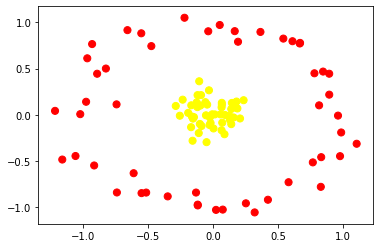

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

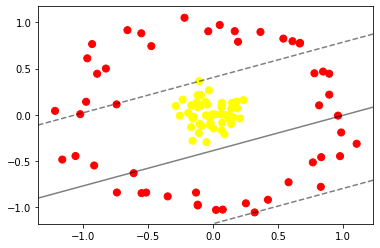

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.98104682, 0.94991608, 0.32015059, 0.91417972, 0.97312039,
       0.98454914, 0.96130685, 0.37603115, 0.94696553, 0.97481367,
       0.98925169, 0.46164816, 0.98730273, 0.94843599, 0.2668238 ,
       0.26881532, 0.4410465 , 0.96881144, 0.50914467, 0.36061616,
       0.9919669 , 0.40673897, 0.40651309, 0.97887166, 0.95434841,
       0.38780584, 0.97690995, 0.97777468, 0.42858886, 0.34903569,
       0.99678856, 0.36044642, 0.96312527, 0.27941319, 0.99981824,
       0.99688647, 0.96611412, 0.36967185, 0.22677595, 0.38426976,
       0.94161704, 0.97864372, 0.96395007, 0.97771244, 0.33805948,
       0.42664755, 0.36554836, 0.92103238, 0.37788536, 0.35093479,
       0.37828868, 0.97107457, 0.99990298, 0.95018737, 0.95677915,
       0.98001037, 0.98398893, 0.29685616, 0.39739433, 0.36944198,
       0.99185061, 0.34826324, 0.31588693, 0.44514242, 0.98562924,
       0.93606808, 0.97434712, 0.42031807, 0.4293518 , 0.31604837,
       0.37845967, 0.91181881, 0.93091785, 0.45855043, 0.37642

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.28232996e-01, -5.18786358e-02],
       [ 8.69689612e-02, -2.09327587e-01],
       [-9.16242141e-01, -5.47233167e-01],
       [-5.12799184e-02, -2.95124495e-01],
       [-1.64123468e-01, -1.76340370e-02],
       [ 1.24346336e-01, -1.04622103e-02],
       [ 1.86129891e-01,  6.94066420e-02],
       [ 2.51596407e-01, -9.56442650e-01],
       [-9.37137005e-02,  2.13799740e-01],
       [ 1.57249054e-01, -2.79582936e-02],
       [ 6.44569859e-02,  8.15584892e-02],
       [-6.12401178e-01, -6.30806656e-01],
       [-2.80202938e-02, -1.09514522e-01],
       [ 1.79441208e-01,  1.44020257e-01],
       [-1.05984646e+00, -4.44850825e-01],
       [-9.69282423e-01,  6.11737097e-01],
       [-3.81356300e-02,  9.03963843e-01],
       [ 6.43255623e-02, -1.65974400e-01],
       [ 8.15112115e-01,  1.03030695e-01],
       [ 4.21201940e-01, -9.17894377e-01],
       [-2.02553961e-02, -8.74943353e-02],
       [-3.50164629e-01, -8.81458097e-01],
       

In [13]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

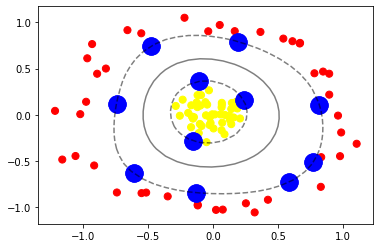

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

## Ajustar los parámetros de SVM

In [15]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

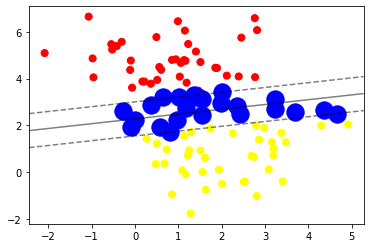

In [16]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

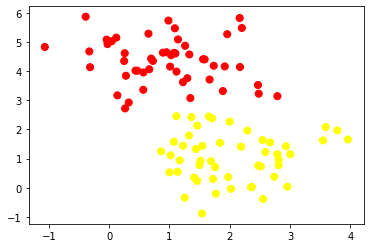

In [17]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

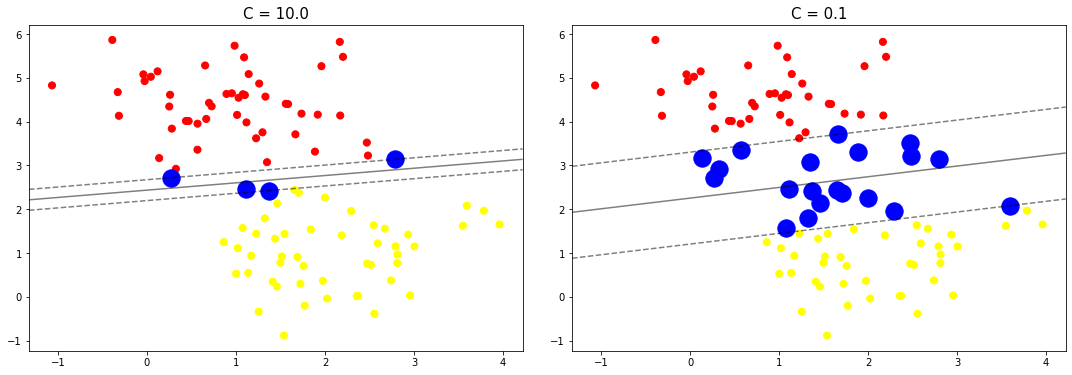

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)